<a href="https://colab.research.google.com/github/AleemRahil/AI-DS/blob/main/Scikitlrn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
df=pd.read_csv('cost_revenue_dirty.csv')
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [ ]:
nan_rows=df.isna().values.any()
nan_rows

False

In [ ]:
df.duplicated().values.any()


False

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [ ]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']
 
for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        df[col] = df[col].astype(str).str.replace(char, "")
    # Convert column to a numeric data type
    df[col] = pd.to_numeric(df[col])

df

<ipython-input-15-567d7e494300>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col] = df[col].astype(str).str.replace(char, "")


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,15000000,0,0
5387,126,12/18/2018,Aquaman,160000000,0,0
5388,96,12/31/2020,Singularity,175000000,0,0
5389,1119,12/31/2020,Hannibal the Conqueror,50000000,0,0


In [ ]:
df.Release_Date=pd.to_datetime(df.Release_Date)

In [ ]:
df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


In [ ]:
df.USD_Production_Budget.mean()

31113737.57837136

In [ ]:
df.USD_Worldwide_Gross.mean()

88855421.96271564

In [ ]:
df.USD_Worldwide_Gross.idxmin()

1

In [ ]:
df.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [ ]:
domestic_flop=df[df['USD_Domestic_Gross']==0]
domestic_flop.value_counts()

Rank  Release_Date  Movie_Title                  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
96    2020-12-31    Singularity                  175000000              0                    0                     1
126   2018-12-18    Aquaman                      160000000              0                    0                     1
4937  2013-05-14    Black Rock                   1000000                0                    0                     1
4936  2012-09-10    Truth or Die                 1000000                0                    0                     1
4935  2012-03-20    Snow White: A Deadly Summer  1000000                0                    0                     1
                                                                                                                  ..
4074  2009-07-07    Flying By                    5000000                4568257              0                     1
4073  2012-10-26    Mientras duermes             5000000             

In [ ]:
intl_flop=df[df['USD_Worldwide_Gross']==0]
intl_flop.value_counts()

Rank  Release_Date  Movie_Title                                                                             USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
96    2020-12-31    Singularity                                                                             175000000              0                    0                     1
4948  2016-12-31    Chemical Cut                                                                            1000000                0                    0                     1
5038  2014-12-31    Light from the Darkroom                                                                 600000                 0                    0                     1
5037  2014-08-08    The Maid's Room                                                                         600000                 0                    0                     1
5036  2002-08-23    Crop Circles: Quest for Truth                                                           600000           

In [ ]:
international_releases = df.loc[(df.USD_Domestic_Gross == 0) & 
                                  (df.USD_Worldwide_Gross != 0)]

In [ ]:
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [ ]:
scrape_date=pd.Timestamp('2018-05-1')

In [ ]:
clean_df=df[df.Release_Date<=scrape_date]
clean_df

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


In [ ]:
money_losing = clean_df.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/clean_df.shape[0]

0.37277117384843983

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

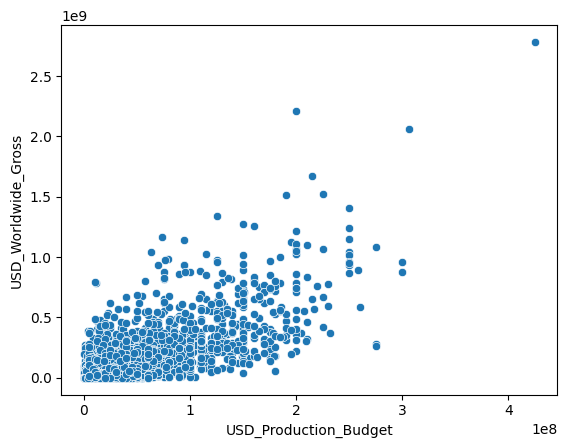

In [ ]:
sns.scatterplot(data=clean_df,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

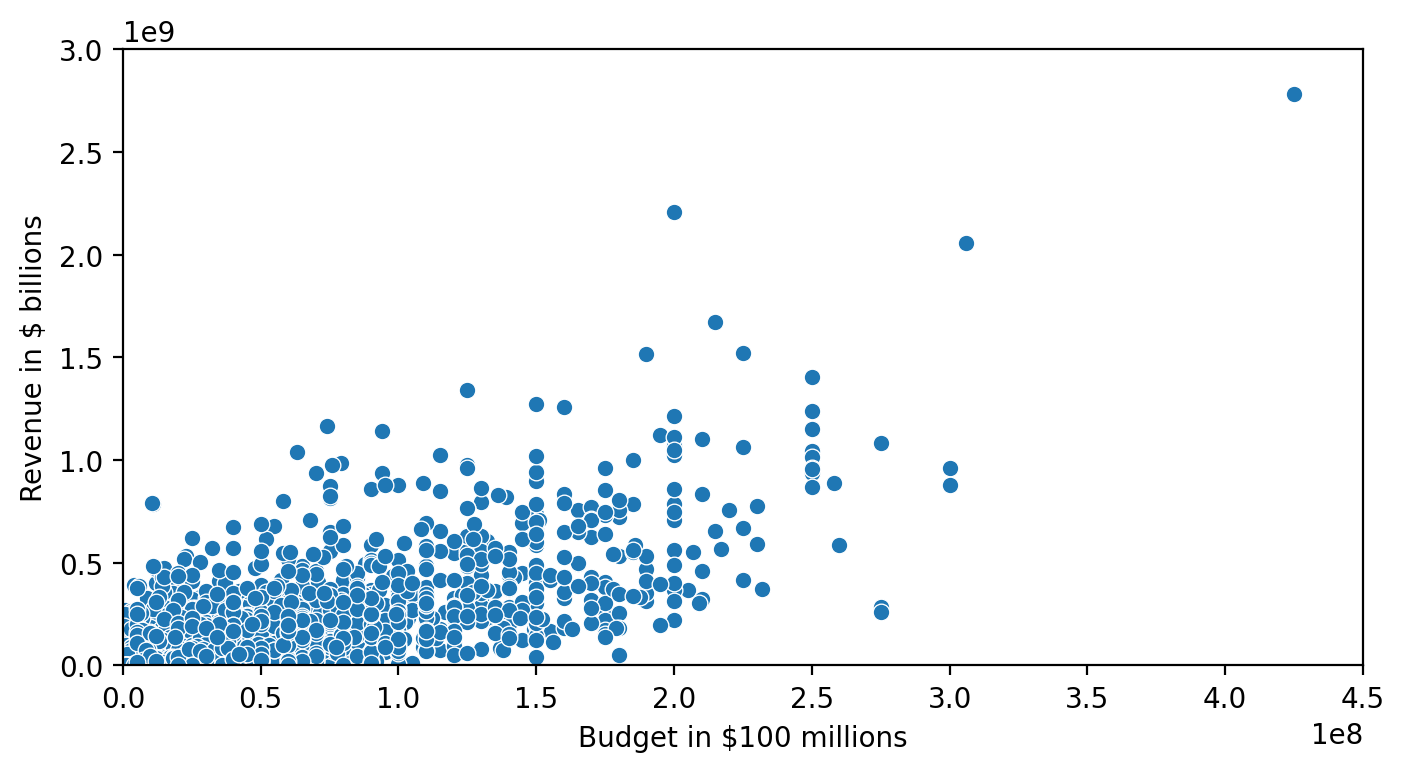

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
ax = sns.scatterplot(data=clean_df,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
 
plt.show()

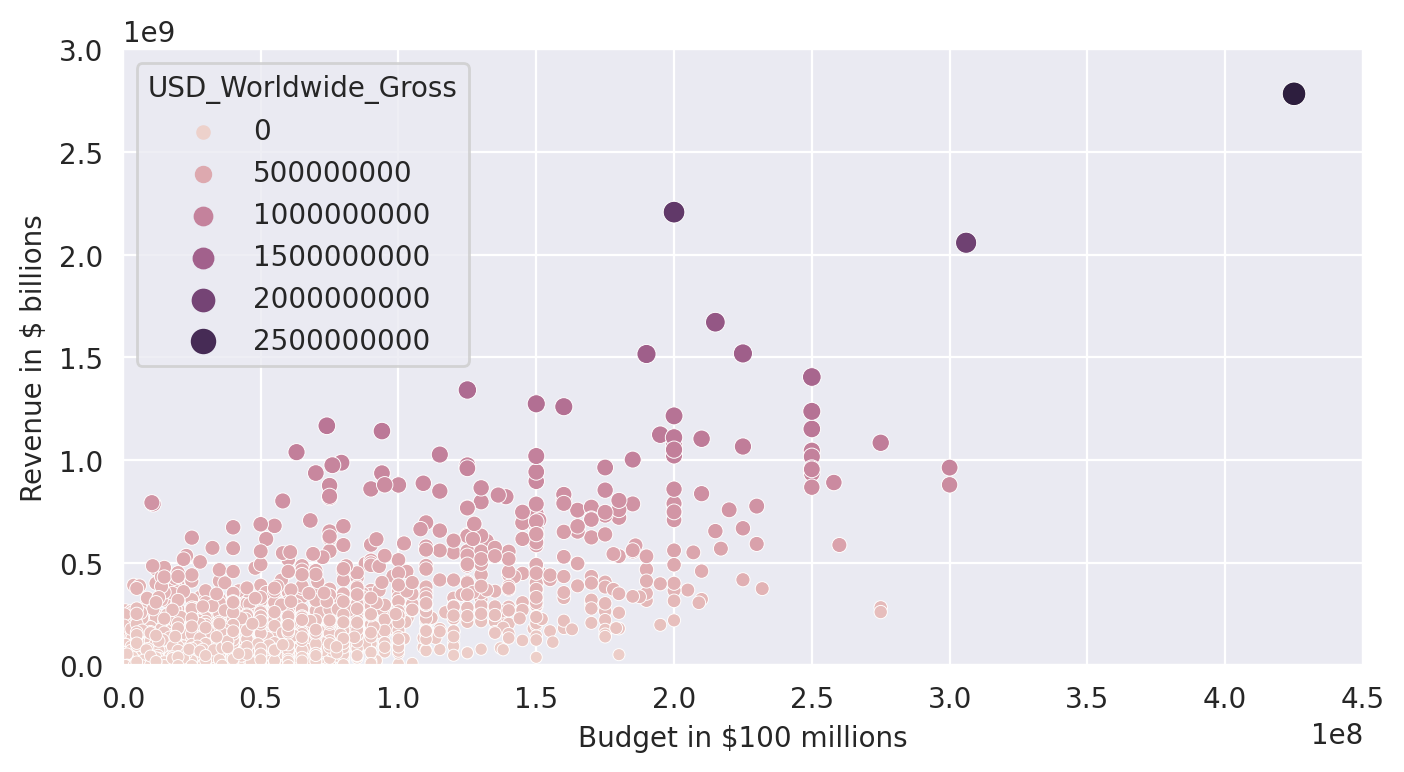

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style('darkgrid'):

  ax = sns.scatterplot(data=clean_df,
                      x='USD_Production_Budget', 
                      y='USD_Worldwide_Gross',
                      hue='USD_Worldwide_Gross',
                      size='USD_Worldwide_Gross')
  
  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')
  
  plt.show()

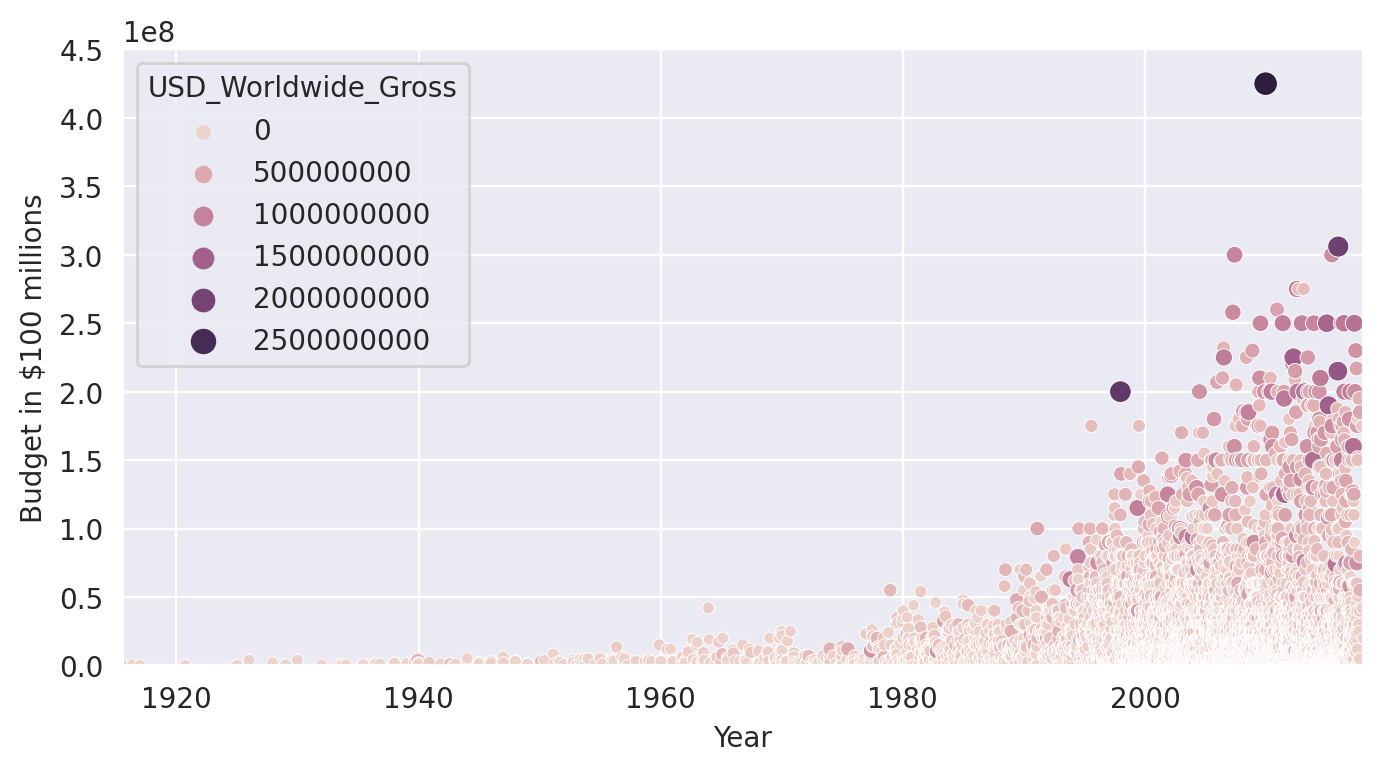

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=clean_df, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(clean_df.Release_Date.min(), clean_df.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

plt.show()

In [ ]:
dt_index = pd.DatetimeIndex(clean_df.Release_Date)
years = dt_index.year
decades=(years//10)*10
clean_df['Decade']=decades
clean_df

<ipython-input-52-cb43f9ab46fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Decade']=decades


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184,2010
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812,2010
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066,2010
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343,2010


In [ ]:
old_films = clean_df[clean_df.Decade <= 1960]
new_films = clean_df[clean_df.Decade > 1960]

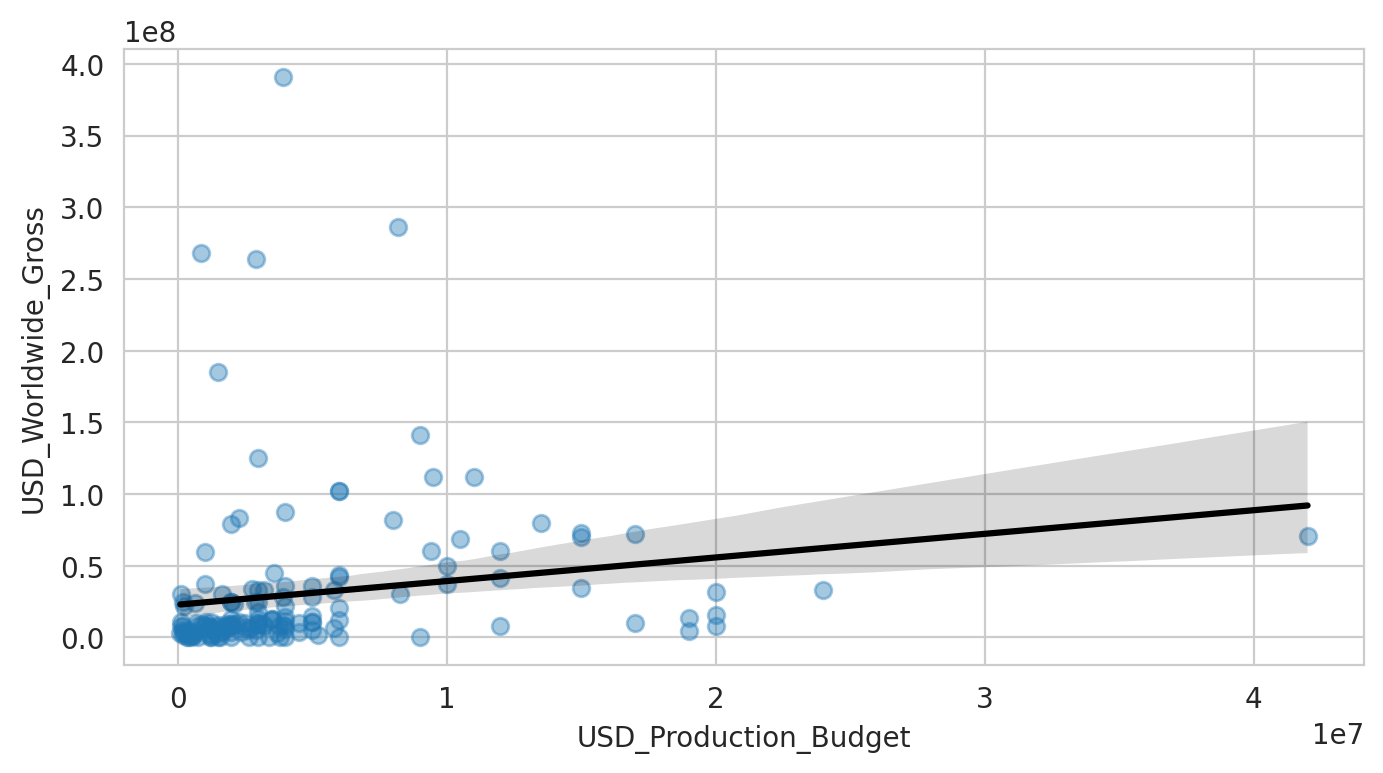

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})

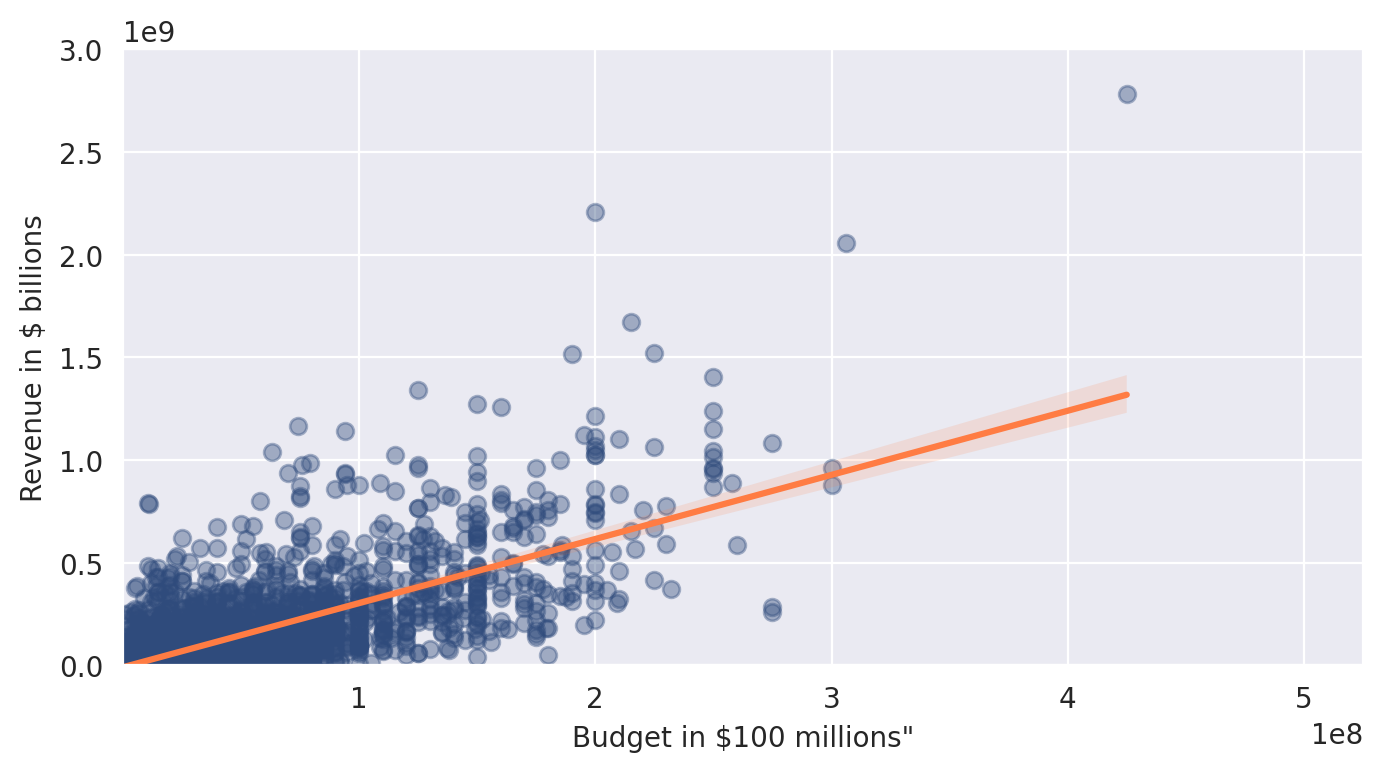

In [ ]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax_new = sns.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            color='#2f4b7c',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': '#ff7c43'})
  ax_new.set(ylim=(0, 3000000000),
           xlim=(clean_df.USD_Production_Budget.min(), clean_df.USD_Production_Budget.max()+100000000),
           xlabel='Budget in $100 millions"',
           ylabel='Revenue in $ billions')
  
plt.show()

In [ ]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 
regression.fit(X, y)


LinearRegression()

In [ ]:
regression.coef_

array([[3.12259592]])

In [ ]:
regression.intercept_

array([-8650768.00661027])

In [ ]:
regression.score(X, y)


0.5577032617720403

In [ ]:
old_regression = LinearRegression()
old_X= pd.DataFrame(old_films, columns=['USD_Production_Budget'])
old_y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross']) 
old_regression.fit(old_X, old_y)


LinearRegression()

In [ ]:
old_regression.coef_

array([[1.64771314]])

In [ ]:
old_regression.intercept_

array([22821538.63508039])

In [ ]:
old_regression.score(old_X, old_y)

0.02937258620576877

In [ ]:
budget = 350000000
revenue_estimate = old_regression.intercept_[0] + old_regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $600000000.0.
